<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [17.3 Cubic Spline Interpolation](chapter17.03-Cubic-Spline-Interpolation.ipynb)  | [Contents](Index.ipynb) | [17.5 Newton's Polynomial Interpolation](chapter17.05-Newtons-Polynomial-Interpolation.ipynb) >

# Lagrange Polynomial Interpolation

Rather than finding cubic polynomials between subsequent pairs of data points, **Lagrange polynomial interpolation** finds a single polynomial that goes through all the data points. This polynomial is referred to as a **Lagrange polynomial**, $L(x)$, and as an interpolation function, it should have the property $L(x_i) = y_i$ for every point in the data set. For computing Lagrange polynomials, it is useful to write them as a linear combination of **Lagrange basis polynomials**, $P_i(x)$, where
$$
P_i(x) = \prod_{j = 1, j\ne i}^n\frac{x - x_j}{x_i - x_j},
$$

and
$$
L(x) = \sum_{i = 1}^n y_i P_i(x).
$$

Here, $\prod$ means "the product of" or "multiply out."

You will notice that by construction, $P_i(x)$ has the property that $P_i(x_j) = 1$ when $i = j$ and $P_i(x_j) = 0$ when $i \ne j$. Since $L(x)$ is a sum of these polynomials, you can observe that $L(x_i) = y_i$ for every point, exactly as desired.

**TRY IT!** Find the Lagrange basis polynomials for the data set *x = [0, 1, 2]* and *y = [1, 3, 2]*. Plot each polynomial and verify the property that $P_i(x_j) = 1$ when $i = j$ and $P_i(x_j) = 0$ when $i \ne j$.


\begin{eqnarray*}
P_1(x) &=& \frac{(x - x_2)(x - x_3)}{(x_1-x_2)(x_1-x_3)} = \frac{(x - 1)(x - 2)}{(0-1)(0-2)} = \frac{1}{2}(x^2 - 3x + 2),\\
P_2(x) &=& \frac{(x - x_1)(x - x_3)}{(x_2-x_1)(x_2-x_3)} = \frac{(x - 0)(x - 2)}{(1-0)(1-2)} = -x^2 + 2x,\\
P_3(x) &=& \frac{(x - x_1)(x - x_2)}{(x_3-x_1)(x_3-x_2)} = \frac{(x - 0)(x - 1)}{(2-0)(2-1)} = \frac{1}{2}(x^2 - x).
\end{eqnarray*}

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

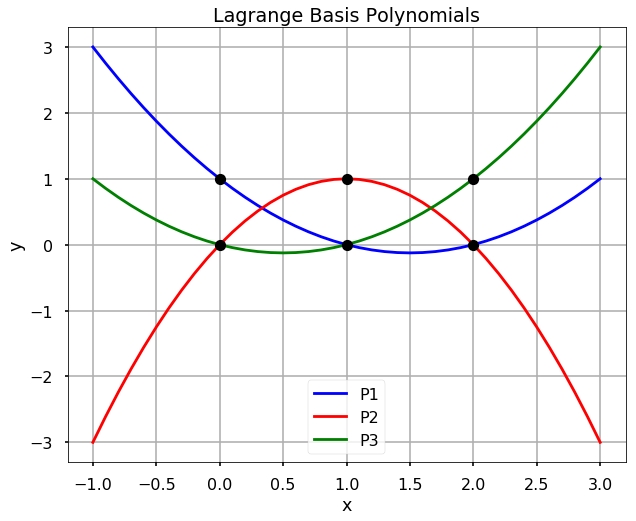

In [2]:
x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

**TRY IT!** For the previous example, compute and plot the Lagrange polynomial and verify that it goes through each of the data points.

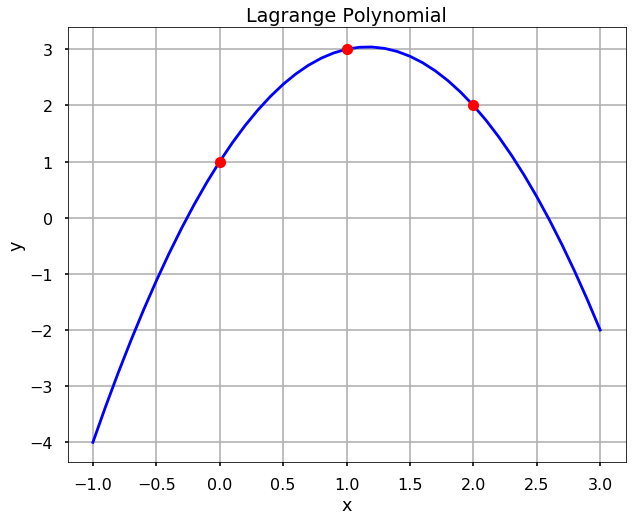

In [3]:
L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**WARNING!** Lagrange interpolation polynomials are defined outside the area of interpolation, that is outside of the interval $[x_1,x_n]$, will grow very fast and unbounded outside this region. This is not a desirable feature because in general, this is not the behavior of the underlying data. Thus, a Lagrange interpolation should never be used to interpolate outside this region.

## Using lagrange from scipy

Instead of we calculate everything from scratch, in scipy, we can use the *lagrange* function directly to interpolate the data. Let's see the above example. 

In [4]:
from scipy.interpolate import lagrange

In [5]:
f = lagrange(x, y)

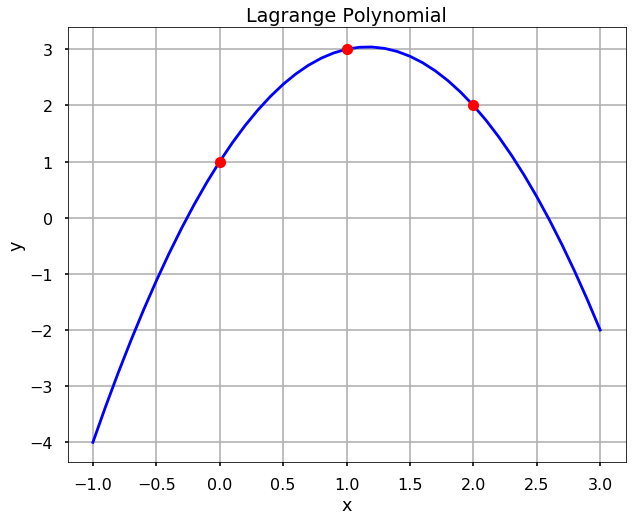

In [6]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<!--NAVIGATION-->
< [17.3 Cubic Spline Interpolation](chapter17.03-Cubic-Spline-Interpolation.ipynb)  | [Contents](Index.ipynb) | [17.5 Newton's Polynomial Interpolation](chapter17.05-Newtons-Polynomial-Interpolation.ipynb) >